In [1]:
# load packages
import numpy as np
from IPython.display import SVG
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
from pathlib import Path
import pandas as pd
import pickle
import glob

repo = Path('../')
datadir = Path('../raw_processed_data')




In [103]:
df= pd.read_pickle(datadir.joinpath('raw_processed_validated.pkl'))

In [104]:
base = plt.cm.get_cmap('cubehelix')
base

In [105]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

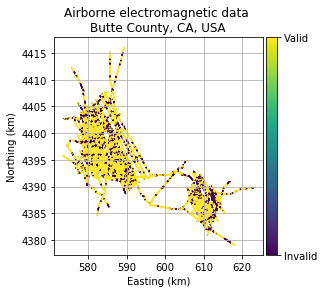

In [119]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors
cmap=plt.cm.viridis
# norm = matplotlib.colors.BoundaryNorm((.5,), ncolors=2)
# norm = matplotlib.colors.BoundaryNorm(np.arange(-2.5,3,1), cmap.N)
f,ax = plt.subplots(1,figsize=(4,4))
grid = plt.scatter(df.UTMX/1000,df.UTMY/1000,c=df.VALID.astype(int),s=.05,cmap=cmap)
ax.grid(True)
plt.title('Airborne electromagnetic data \nButte County, CA, USA')
plt.xlabel('Easting (km)')
plt.ylabel('Northing (km)')



divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(grid, cax=cax,orientation='vertical')
cb.set_ticks((0,1))
cb.set_ticklabels(('Invalid','Valid'))
# f.subplots_adjust(left=0.5)
plt.savefig(repo.joinpath('AEM_map.eps'),dpi=300,bbox_inches='tight')


In [122]:
lm_std_cols = [c for c in df.columns if c.startswith('DBDT_STD_Ch1')]
lm_cols = [c for c in df.columns if c.startswith('DBDT_Ch1')]
hm_std_cols = [c for c in df.columns if c.startswith('DBDT_STD_Ch2')]
hm_cols = [c for c in df.columns if c.startswith('DBDT_Ch2')]


invalid_sounding = df.index[np.logical_and(df.VALID==False,df.LINE_NO==100201)]
valid_sounding  = df.index[df.VALID==True]



In [121]:
df.LINE_NO.unique()

array([100101, 100201, 100701, 100801, 100202, 100702, 100802, 100601,
       100501, 100401, 200501, 200401, 100301, 200601, 710501, 710401,
       710301, 101501, 200101, 101601, 101602, 101702, 101701, 101801,
       101902, 102002, 200801, 710601, 102601, 102501, 102401, 102301,
       200701, 101901, 102001, 102101, 102201, 710201, 101201, 101101,
       101001, 100901, 200301, 200201, 101301, 101401, 710101, 730101,
       730201, 730301, 300901, 301001, 301101, 301301, 301201, 300801,
       300700, 300601, 300501, 300401, 300301, 300201, 300101, 400401,
       400301, 400201, 400202, 400101, 400102, 730401, 730102, 730402,
       730302])

(1, 1792)

Text(0, 0.5, '$db/dt$ (V/$m^2$)')

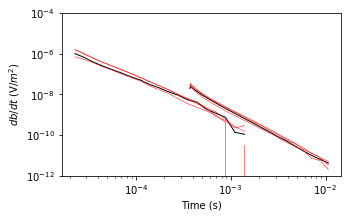

In [152]:
gates_lm =  [ 7.150E-07, 2.215E-06, 4.215E-06, 6.215E-06, 8.215E-06, 1.022E-05, 1.221E-05, 1.472E-05, 1.821E-05, 2.271E-05, 2.821E-05, 3.522E-05, 4.421E-05, 5.571E-05, 7.021E-05, 8.821E-05, 1.107E-04, 1.387E-04, 1.742E-04, 2.197E-04, 2.767E-04, 3.487E-04, 4.397E-04, 5.537E-04, 6.977E-04, 8.792E-04, 1.108E-03, 1.396E-03]
gates_hm = [ 3.492E-04, 3.507E-04, 3.527E-04, 3.547E-04, 3.567E-04, 3.587E-04, 3.607E-04, 3.632E-04, 3.667E-04, 3.712E-04, 3.767E-04, 3.837E-04, 3.927E-04, 4.042E-04, 4.187E-04, 4.367E-04, 4.592E-04, 4.872E-04, 5.227E-04, 5.682E-04, 6.252E-04, 6.972E-04, 7.882E-04, 9.022E-04, 1.046E-03, 1.228E-03, 1.457E-03, 1.745E-03, 2.109E-03, 2.567E-03, 3.146E-03, 3.865E-03, 4.744E-03, 5.821E-03, 7.139E-03, 8.753E-03, 1.073E-02]


f,ax = plt.subplots(1,figsize=(5,3))

gates_start = 9

plt.loglog(gates_lm[gates_start:],df.loc[valid_sounding+1,lm_cols[gates_start:]],'k',lw=1,label='Valid sounding')
plt.loglog(gates_hm[gates_start:],df.loc[valid_sounding,hm_cols[gates_start:]],'k',lw=1,)

for i,s in enumerate(invalid_sounding):
    if i>25 and i<32:
#         if s in (422,):
        plt.loglog(gates_lm[gates_start:],df.loc[s+1,lm_cols[gates_start:]],'r',label=s,lw=.5)
        plt.loglog(gates_hm[gates_start:],df.loc[s,hm_cols[gates_start:]],'r',label=s,lw=.5)

plt.ylim(1e-12,1e-4)
# plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('$db/dt$ (V/$m^2$)')

In [ ]:

plt.semilogy()